In [1]:
from src.Preprocess_Data import Preprocess_Data
from src.Classify_Data import Classify_Data
from src.Visualize_Results import Visualize_Results
import warnings
warnings.filterwarnings('ignore')

In [2]:
# we load our data
path = 'data/train.csv'
Pd = Preprocess_Data(path)
data = Pd.load_data_from_csv()
data = data.drop('id', axis=1)
data.head()

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [3]:
# we normalize our data between 0 and 1
df = data.drop('species', axis=1)
columns = df.columns
df_normalized = Pd.normalize_data(df, columns)
data[columns] = df_normalized
data.head()

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Opalus,0.088883,0.114287,0.150003,0.022987,0.105264,0.031447,0.297875,0.0,0.025639,...,0.018181,0.000000,0.016951,0.014635,0.330258,0.0,0.0,0.012987,0.000000,0.179315
1,Pterocarya_Stenoptera,0.066662,0.000000,0.200000,0.091955,0.228070,0.006289,0.212763,0.0,0.000000,...,0.002274,0.000000,0.000000,0.004880,0.220178,0.0,0.0,0.002599,0.449433,0.158623
2,Quercus_Hartwissiana,0.066662,0.047620,0.124998,0.045975,0.035085,0.018867,0.744676,0.0,0.000000,...,0.359096,0.000000,0.033896,0.004880,0.073387,0.0,0.0,0.000000,0.235957,0.020692
3,Tilia_Tomentosa,0.000000,0.019046,0.150003,0.034481,0.192976,0.062892,0.255324,0.0,0.179489,...,0.000000,0.004833,0.000000,0.000000,0.192654,0.0,0.0,0.046752,0.000000,0.337938
4,Quercus_Variabilis,0.066662,0.019046,0.312499,0.057474,0.122806,0.050314,0.063826,0.0,0.000000,...,0.224999,0.000000,0.124293,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.220692


In [4]:
labels = data['species'].copy()
encoded_labels = Pd.label_encoding(labels)
data['species'] = encoded_labels
data.head()

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,3,0.088883,0.114287,0.150003,0.022987,0.105264,0.031447,0.297875,0.0,0.025639,...,0.018181,0.000000,0.016951,0.014635,0.330258,0.0,0.0,0.012987,0.000000,0.179315
1,49,0.066662,0.000000,0.200000,0.091955,0.228070,0.006289,0.212763,0.0,0.000000,...,0.002274,0.000000,0.000000,0.004880,0.220178,0.0,0.0,0.002599,0.449433,0.158623
2,65,0.066662,0.047620,0.124998,0.045975,0.035085,0.018867,0.744676,0.0,0.000000,...,0.359096,0.000000,0.033896,0.004880,0.073387,0.0,0.0,0.000000,0.235957,0.020692
3,94,0.000000,0.019046,0.150003,0.034481,0.192976,0.062892,0.255324,0.0,0.179489,...,0.000000,0.004833,0.000000,0.000000,0.192654,0.0,0.0,0.046752,0.000000,0.337938
4,84,0.066662,0.019046,0.312499,0.057474,0.122806,0.050314,0.063826,0.0,0.000000,...,0.224999,0.000000,0.124293,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.220692


In [5]:
X_train, X_test, y_train, y_test = Pd.Split_data(data, 'species')

In [24]:
six_classifiers = [ 
    {
        'model':'RandomForestClassifier',
        'params': {
            'n_estimators' : [50, 75, 100],
            'min_samples_split': [2, 3, 4, 5],
            'criterion': ["gini", "entropy"],
        }
    },
    {
        'model':'AdaBoostClassifier',   
        'params':{
            'n_estimators': [50, 75, 100], 
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    {
        'model': 'BaggingClassifier', #plus de 30min
        'params':{
            'n_estimators': [50, 75, 100],
            'max_samples': [0.5, 0.7, 1.0],
            'bootstrap': [True, False]
        } 
    },
    {
        'model': 'SGDClassifier', #one min meme pas
        'params':{
            'loss': ['hinge', 'log_loss'],
            'alpha': [0.0001, 0.001, 0.01],
        }
    },
    {
        'model': 'SVC',  #takes qlq secondes bash entraina
        'params':{
            'kernel': ['linear', 'poly','rbf','sigmoid']
        }
 
    },
    {
        'model': 'LogisticRegression', # 2mins
        'params':{
            'C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 1.5, 2.0],
            'solver': ['liblinear', 'newton-cg', 'lbfgs']
        }
    }
    
     
]

In [23]:
six_classifiers =[{
        'model': 'SGDClassifier', #one min meme pas
        'params':{
            'loss': ['hinge', 'log_loss'],
            'alpha': [0.0001, 0.001, 0.01],
        }
    },
    {
        'model': 'KNeighborsClassifier',  #takes qlq secondes bash entraina
        'params':{
            'n_neighbors': [3, 5, 7, 10, 12, 15],
        }
 
    },
    {
        'model': 'LogisticRegression', # 2mins
        'params':{
            'C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 1.5, 2.0],
            'solver': ['liblinear', 'newton-cg', 'lbfgs']
        }
    }
]

In [20]:
six_classifiers =[
    {
        'model': 'KNeighborsClassifier',  #takes qlq secondes bash entraina
        'params':{
            'n_neighbors': [3, 5, 7, 10, 12, 15]
        }
 
    }
]

In [25]:
Cd = Classify_Data()
classifiers = Cd.get_classifiers(six_classifiers)

trained_classifiers, best_scores, best_estimators = Cd.train_classifier(X_train, y_train, classifiers)


In [26]:
best_scores, best_estimators

([0.9683413078149918,
  0.34987468671679195,
  0.9155388471177945,
  0.9668033720665299,
  0.9819321029847344,
  0.9773866484392799],
 [RandomForestClassifier(min_samples_split=5),
  AdaBoostClassifier(learning_rate=0.01, n_estimators=100),
  BaggingClassifier(bootstrap=False, max_samples=0.7, n_estimators=75),
  SGDClassifier(loss='log_loss'),
  SVC(kernel='linear'),
  LogisticRegression(C=1.5, solver='newton-cg')])

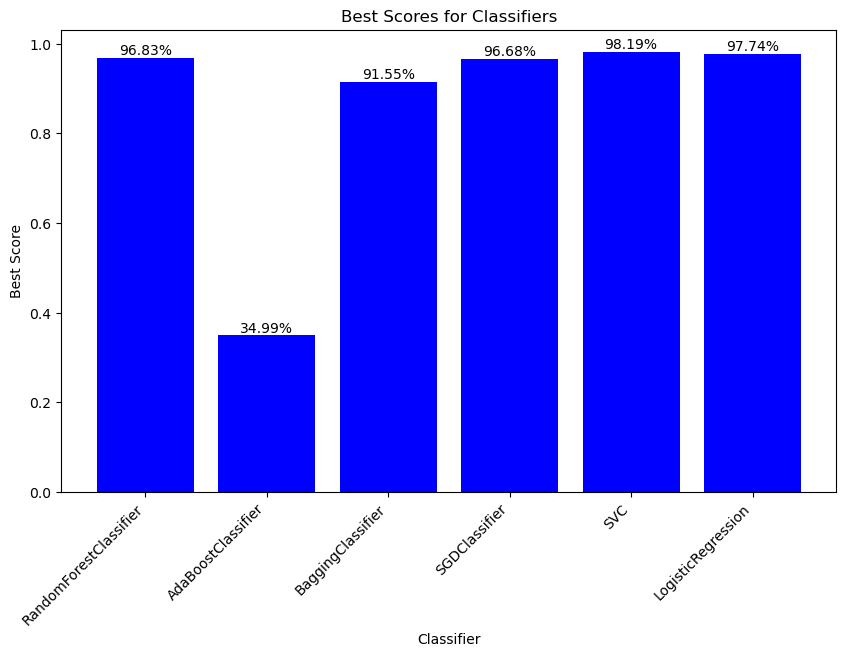

In [27]:
EvR = Visualize_Results()
EvR.plot_training_scores(best_scores, six_classifiers)

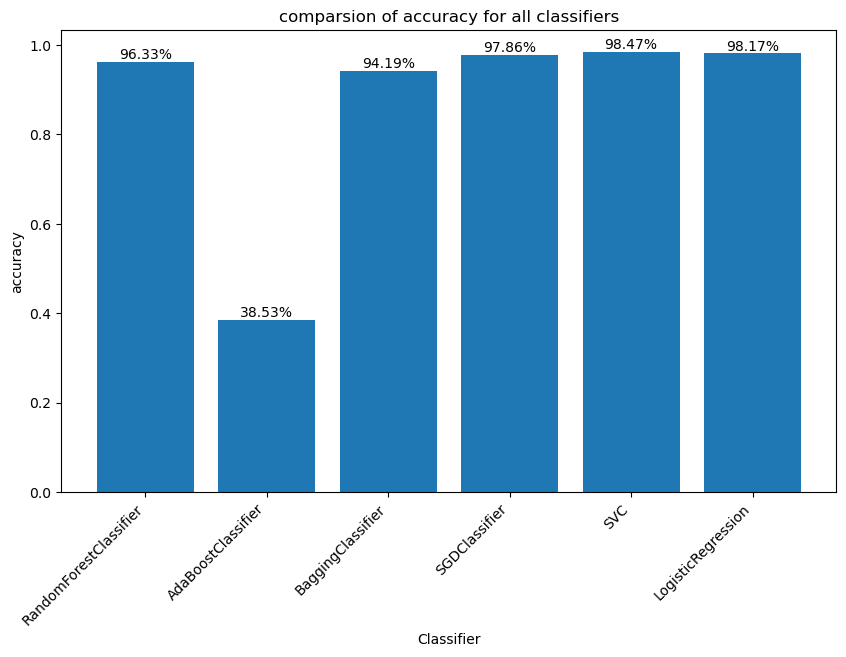

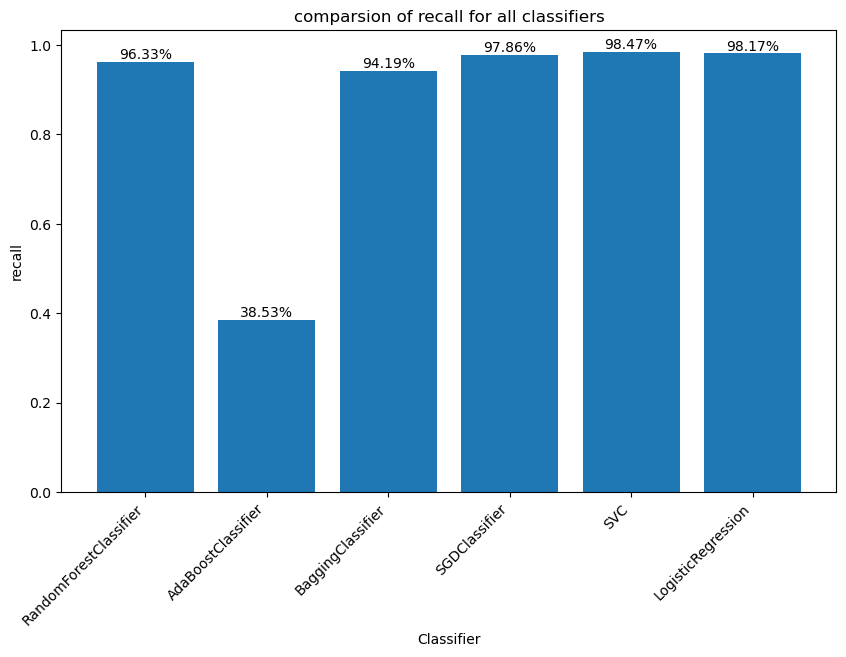

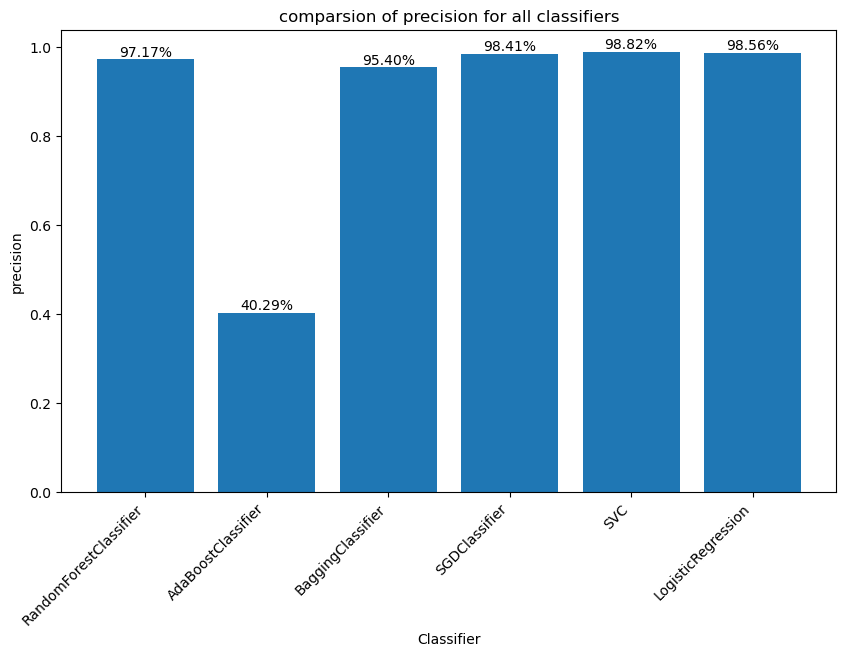

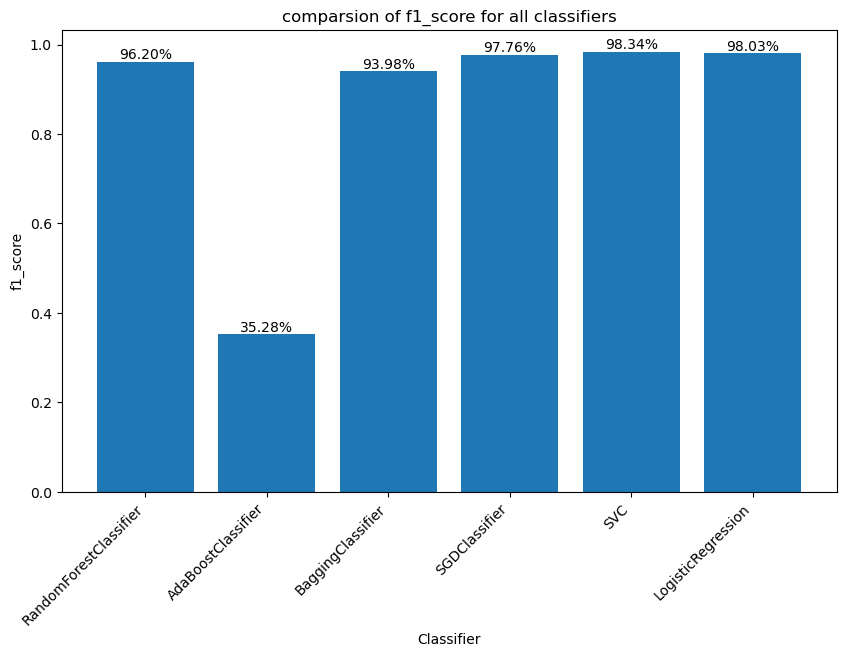

In [29]:
evaluation_results = Cd.predict_and_evaluate(X_test, y_test, trained_classifiers, six_classifiers)
EvR.plot_evaluation_results(evaluation_results)

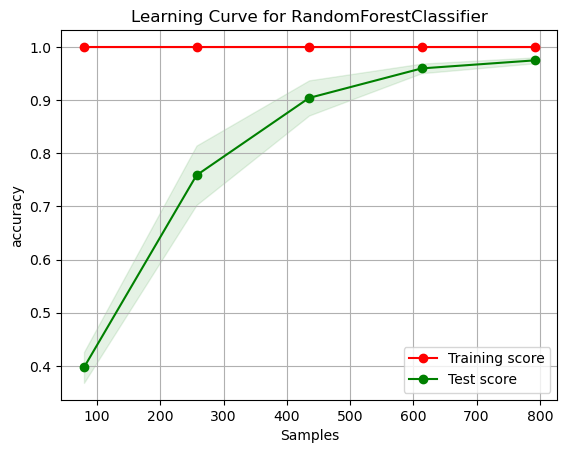

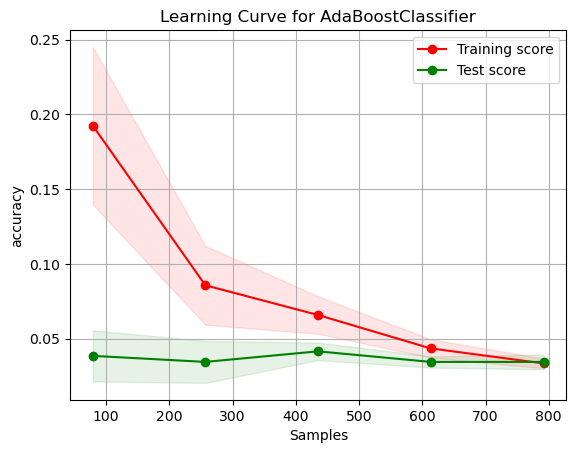

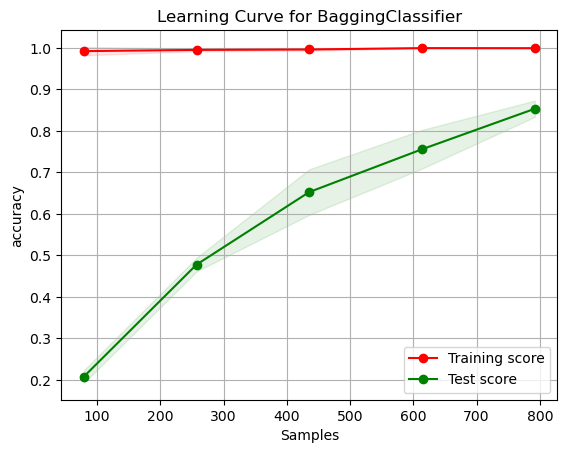

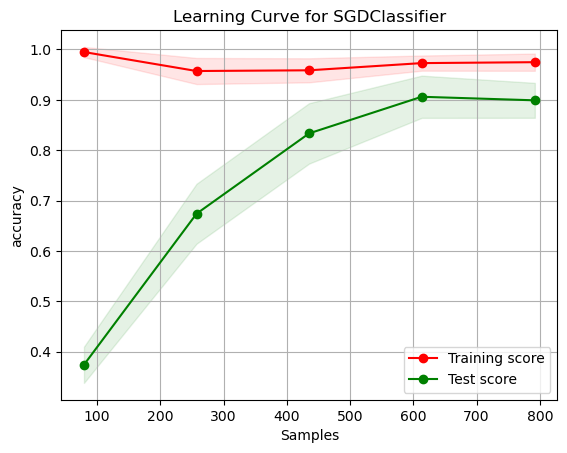

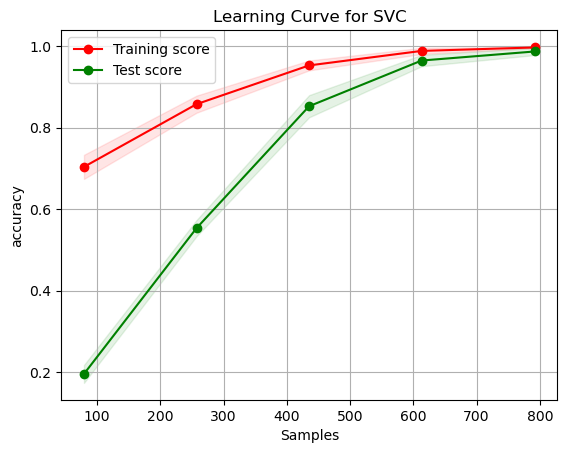

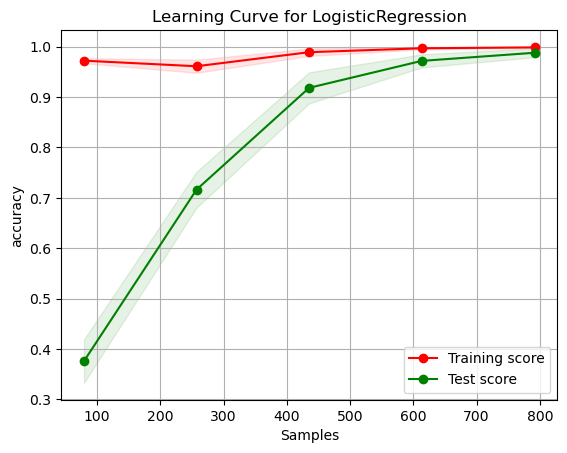

In [28]:
X =data.drop('species', axis = 1)
y = data['species']
EvR.plot_learning_curve(X, y, six_classifiers)

### Apres reduction de la dimensionalite 

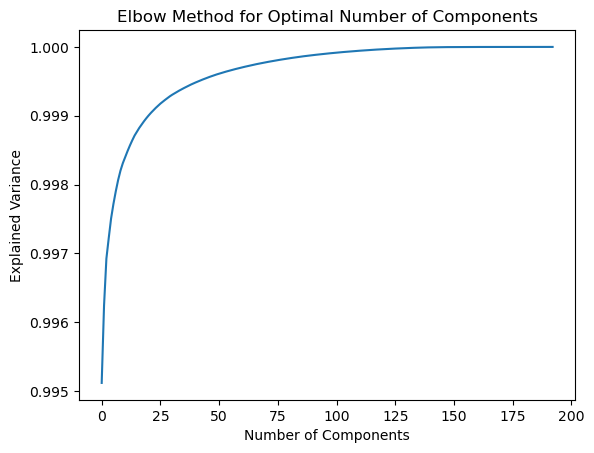

In [7]:
EvR.plot_explained_variance(data)

In [5]:
new_df = Pd.PCA(data,40)
new_df

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_32,component_33,component_34,component_35,component_36,component_37,component_38,component_39,component_40,species
0,4.599773e+01,-0.382820,-0.322560,0.297641,-0.670408,-0.267269,-0.433482,0.100346,0.168292,-0.205483,...,-0.016247,-0.049455,-0.012235,-0.093907,-0.073029,0.066630,0.021023,-0.058409,-0.008554,3
1,7.294060e-07,0.134923,-0.934642,0.333891,-0.039299,0.400577,-0.190646,-0.248064,0.151218,-0.119127,...,-0.037837,-0.055007,0.082680,0.104526,0.159551,0.110460,-0.030665,0.070689,-0.007987,49
2,-1.599786e+01,0.502884,-0.305034,0.350570,0.382587,-0.802724,-0.413959,-0.415607,-0.157789,-0.273238,...,-0.165211,0.201903,-0.019434,0.020813,0.147992,-0.125225,-0.173631,0.157038,-0.064147,65
3,-4.499719e+01,-0.359317,-1.253967,0.000593,-0.452732,-0.144766,0.018824,-0.203432,-0.197057,0.368604,...,-0.070457,-0.104584,0.012615,0.109321,-0.127051,0.194298,-0.081991,0.065742,-0.023019,94
4,-3.499999e+01,0.673337,-0.359369,-0.732343,-0.341423,-0.409304,0.069816,-0.254838,-0.848462,0.206032,...,0.032352,0.027974,0.032672,-0.143723,0.171902,0.100122,0.050732,0.097784,-0.086714,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,9.001640e+00,-1.229634,0.917781,-0.156985,-0.274279,-0.084961,0.189269,-0.396985,-0.154582,0.107578,...,0.171797,-0.062619,-0.133238,-0.078886,0.021426,0.153627,-0.101787,-0.108047,0.206311,40
986,4.399867e+01,0.303971,0.774559,-0.679804,0.209738,0.415451,-0.259141,0.621156,0.068203,0.316161,...,-0.085905,-0.012742,0.196253,0.091517,0.100317,-0.108875,0.053405,-0.016563,-0.087646,5
987,3.800456e+01,0.517128,-0.917852,0.312118,0.417035,0.696791,0.230722,-0.191485,0.181603,0.429254,...,0.135004,0.126971,0.040376,0.077402,0.159105,-0.210994,-0.169131,0.169328,-0.156530,11
988,-2.900320e+01,1.253407,0.493891,-1.627801,0.188432,0.350144,0.148641,0.586365,-0.043515,-0.109287,...,-0.196582,-0.255421,0.276342,0.415836,0.050810,-0.089048,-0.049397,0.171750,-0.190255,78


In [21]:
import pandas as pd
df_normalized = Pd.normalize_data(new_df.iloc[:, :-1], new_df.iloc[:, :-1].columns)
data = pd.concat([df_normalized, new_df['species']], axis=1)
data

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_32,component_33,component_34,component_35,component_36,component_37,component_38,component_39,component_40,species
0,0.969338,0.206724,0.393442,0.536016,0.225348,0.307734,0.274089,0.497768,0.569689,0.345564,...,0.439143,0.442809,0.472281,0.272063,0.396062,0.559679,0.521763,0.416288,0.451107,3
1,0.499978,0.280511,0.227176,0.545905,0.428504,0.608990,0.385685,0.324639,0.562027,0.383542,...,0.413796,0.437044,0.577306,0.478478,0.703288,0.619244,0.453270,0.583014,0.451946,49
2,0.336736,0.332951,0.398203,0.550455,0.564310,0.066197,0.283061,0.241384,0.423364,0.315766,...,0.264259,0.703817,0.464315,0.391397,0.688018,0.298949,0.263820,0.694531,0.368672,65
3,0.040828,0.210074,0.140434,0.454979,0.295418,0.362993,0.481947,0.346817,0.405742,0.598039,...,0.375501,0.385564,0.499778,0.483466,0.324703,0.733179,0.385256,0.576625,0.429658,94
4,0.142839,0.357243,0.383443,0.255029,0.331249,0.243663,0.505380,0.321273,0.113432,0.526543,...,0.496199,0.523211,0.521971,0.220242,0.719603,0.605195,0.561131,0.618006,0.335210,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.591831,0.086040,0.730368,0.411991,0.352863,0.389970,0.560275,0.250638,0.424803,0.483244,...,0.659908,0.429140,0.338391,0.287688,0.520832,0.677907,0.359024,0.352181,0.769710,40
986,0.948940,0.304603,0.691463,0.269362,0.508670,0.615699,0.354208,0.756565,0.524775,0.574976,...,0.357365,0.480932,0.702975,0.464946,0.625042,0.321169,0.564674,0.470330,0.333829,5
987,0.887776,0.334981,0.231737,0.539965,0.575399,0.742608,0.579325,0.352753,0.575662,0.624712,...,0.616713,0.626008,0.530495,0.450263,0.702697,0.182389,0.269783,0.710403,0.231686,11
988,0.204030,0.439912,0.615223,0.010742,0.501811,0.586240,0.541604,0.739277,0.474643,0.387870,...,0.227429,0.228937,0.791594,0.802311,0.559646,0.348114,0.428447,0.713532,0.181678,78


In [22]:
X_train, X_test, y_train, y_test = Pd.Split_data(data, 'species')

In [23]:
six_classifiers = [ 
    {
        'model':'RandomForestClassifier',
        'params': {
            'n_estimators' : [50, 75, 100],
            'min_samples_split': [2, 3, 4, 5],
            'criterion': ["gini", "entropy"],
        }
    },
    {
        'model':'AdaBoostClassifier',   
        'params':{
            'n_estimators': [50, 75, 100], 
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    {
        'model': 'BaggingClassifier', #plus de 30min
        'params':{
            'n_estimators': [50, 75, 100],
            'max_samples': [0.5, 0.7, 1.0],
            'bootstrap': [True, False]
        } 
    },
    {
        'model': 'SGDClassifier', #one min meme pas
        'params':{
            'loss': ['hinge', 'log_loss'],
            'alpha': [0.0001, 0.001, 0.01],
        }
    },
    {
        'model': 'SVC',  #takes qlq secondes bash entraina
        'params':{
            'kernel': ['linear', 'poly','rbf','sigmoid']
        }
 
    },
    {
        'model': 'LogisticRegression', # 2mins
        'params':{
            'C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 1.5, 2.0],
            'solver': ['liblinear', 'newton-cg', 'lbfgs']
        }
    }
    
     
]

In [24]:
Cd = Classify_Data()
classifiers = Cd.get_classifiers(six_classifiers)

trained_classifiers, best_scores, best_estimators = Cd.train_classifier(X_train, y_train, classifiers)


In [25]:
best_scores, best_estimators

([0.9833902939166098,
  0.5549100022784234,
  0.9984962406015038,
  0.8958190931875143,
  0.974356345408977,
  0.9622920938710411],
 [RandomForestClassifier(criterion='entropy', min_samples_split=3),
  AdaBoostClassifier(learning_rate=0.1, n_estimators=100),
  BaggingClassifier(bootstrap=False, max_samples=0.7, n_estimators=100),
  SGDClassifier(loss='log_loss'),
  SVC(kernel='poly'),
  LogisticRegression(C=2.0, solver='newton-cg')])

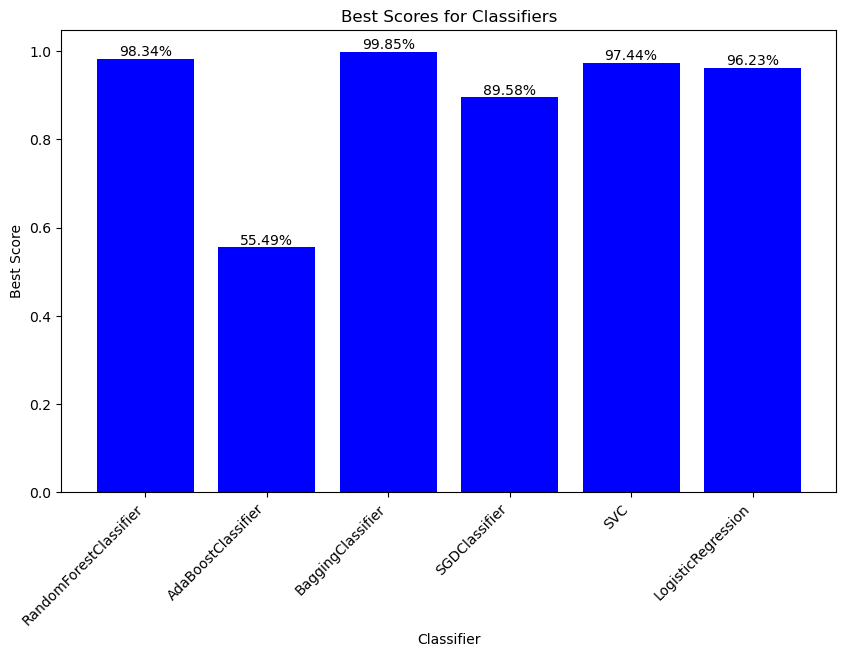

In [27]:
EvR = Visualize_Results()
EvR.plot_training_scores(best_scores, six_classifiers)

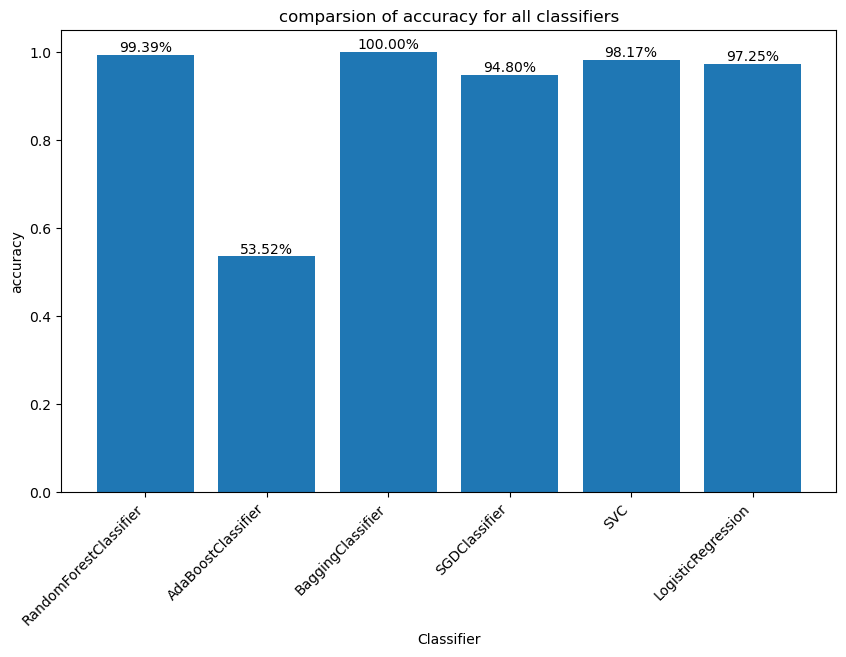

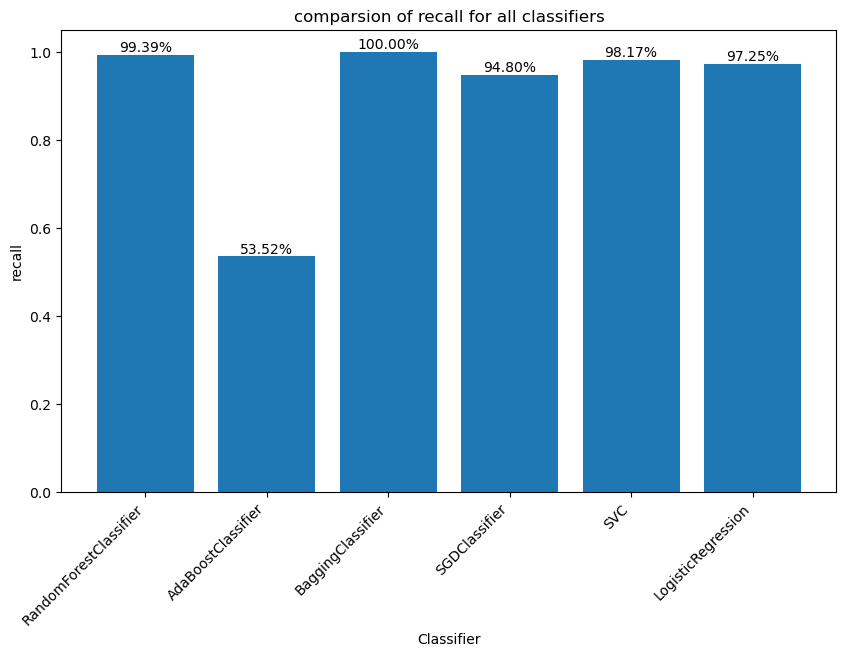

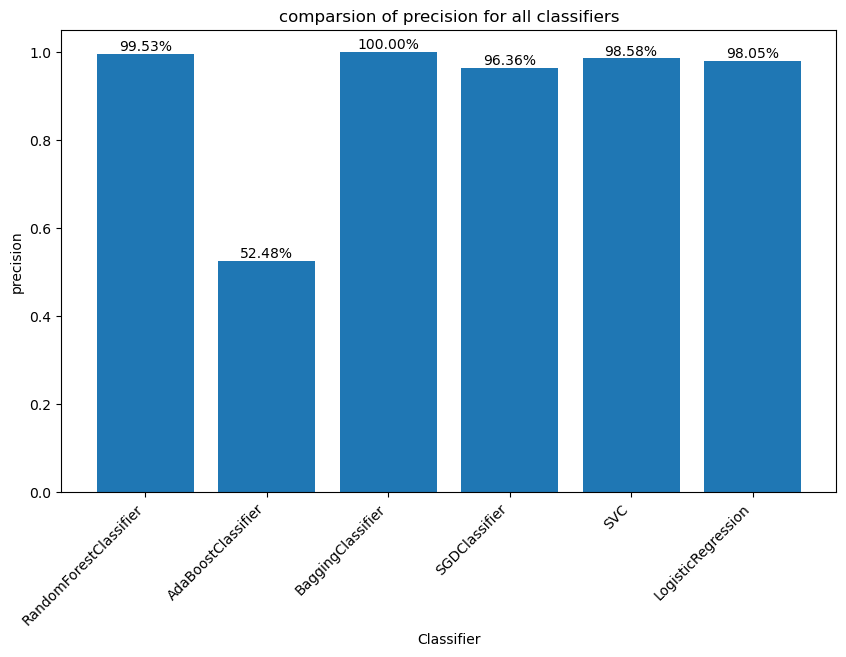

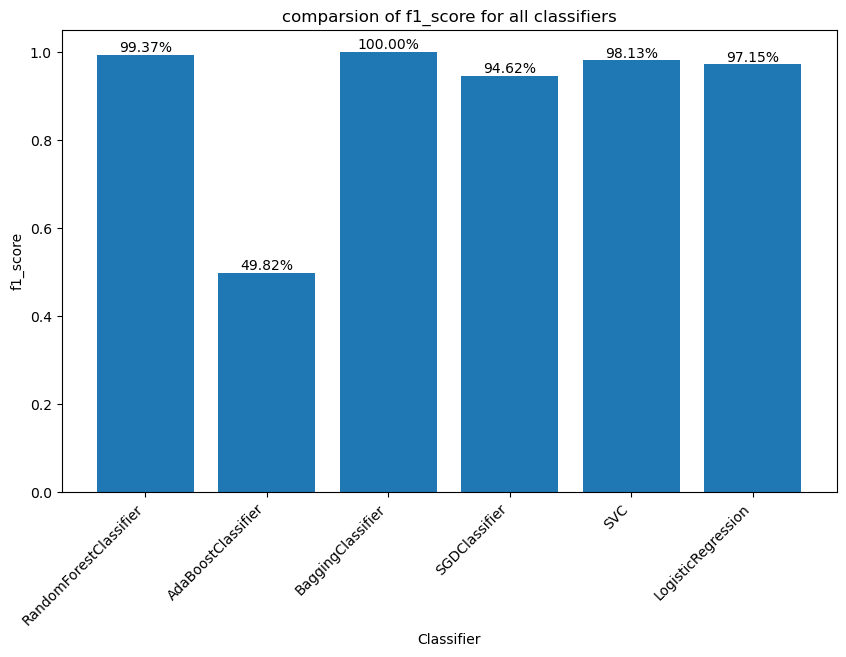

In [28]:
evaluation_results = Cd.predict_and_evaluate(X_test, y_test, trained_classifiers, six_classifiers)
EvR.plot_evaluation_results(evaluation_results)

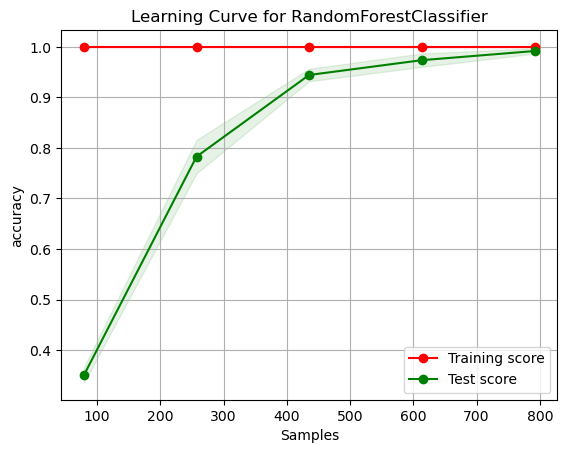

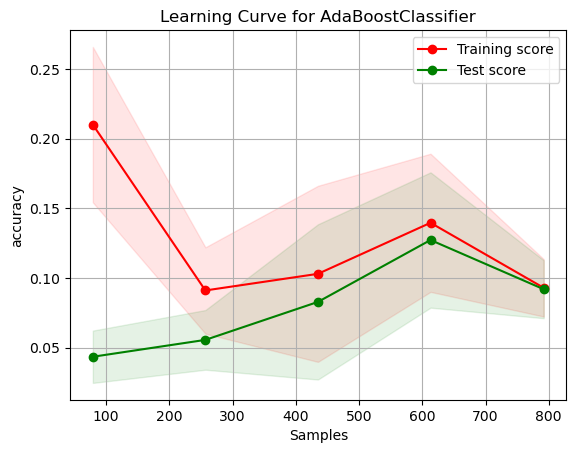

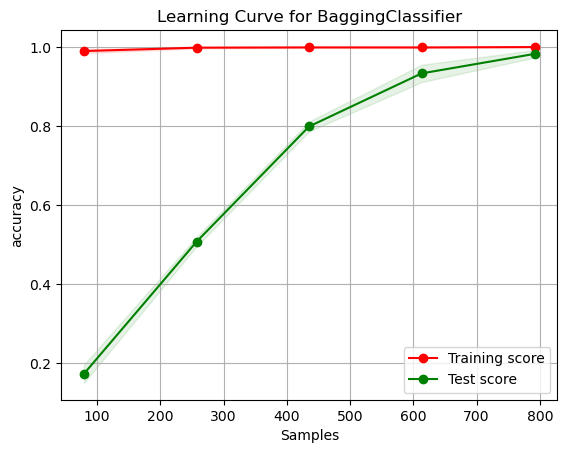

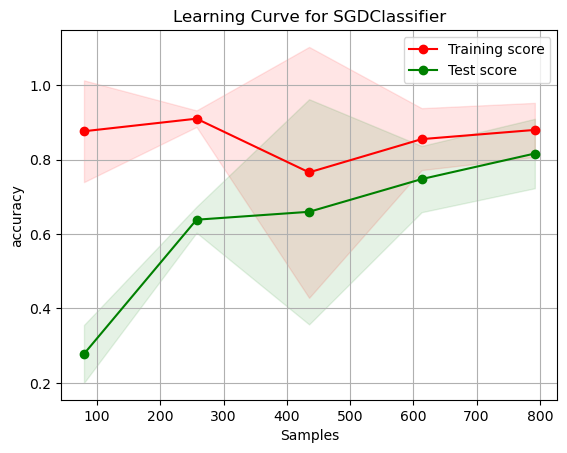

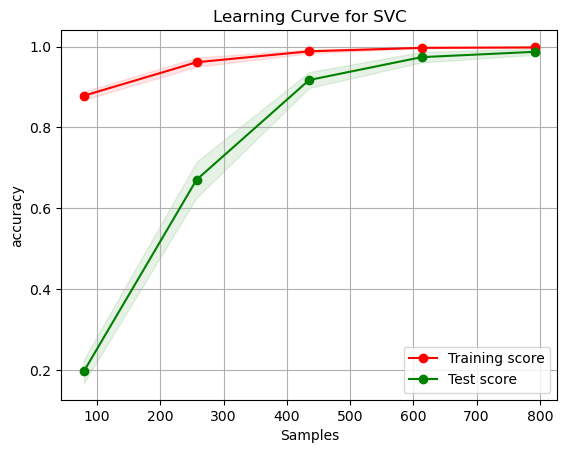

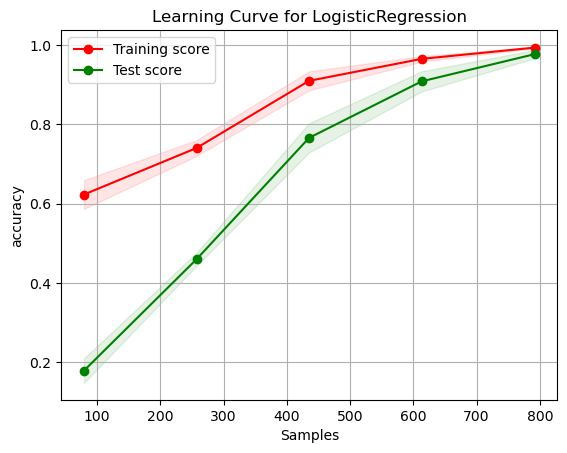

In [29]:
X =data.drop('species', axis = 1)
y = data['species']
EvR.plot_learning_curve(X, y, six_classifiers)